In [18]:
import glob
import os
import matplotlib.pyplot as plt
from skimage import io
import skimage
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import random

In [19]:
#data = "/Users/sebasmos/Downloads/unlabeled-5-top-cities-16-bit-depth"
data = "/Users/sebasmos/Desktop/satellite.extractor/satellite_extractor/DATASET"

In [20]:
folders = glob.glob(os.path.join(data, '*'))
pdf_pages = PdfPages("output.pdf")

def read_tiff(img_path, resize_ratio=None, resizing=True, normalize=True, printing=True):
    img = io.imread(img_path)
    img_F = img.copy()

    path_img = os.path.basename(img_path)
    if normalize:
        CHANNELS = range(12)
        img_F = np.dstack([
            skimage.exposure.rescale_intensity(img_F[:, :, c], out_range=(0, 1))
            for c in CHANNELS])
    if printing:
        print(f"(origin shape: {path_img}: {img.shape} -> rescale: {str(img_F.shape)}) - Range -> [{img_F.min(), img_F.max()}]")
    return img_F

for i, folder in enumerate(folders):
    tiff_files = glob.glob(os.path.join(folder, '*.tiff'))
    random.shuffle(tiff_files)
    selected_files = tiff_files[:10]

    fig, axes = plt.subplots(2, 5, figsize=(12, 6))

    for j, tiff_file in enumerate(selected_files):
        image = read_tiff(tiff_file)
        image = np.array(image)
        image = image[:, :, 1:4]
        axes[j // 5, j % 5].imshow(image)

        folder_name = os.path.basename(folder)
        file_name = os.path.basename(tiff_file)
        title = f"{folder_name} \n{file_name}"
        axes[j // 5, j % 5].set_title(title)
        axes[j // 5, j % 5].axis('off')

    pdf_pages.savefig(fig)
    plt.close(fig)

pdf_pages.close()

(origin shape: 68276_2016-01-24.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-01-10.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-05-08.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-10-02.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-03-13.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-02-28.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-05-01.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-06-05.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-07-10.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]
(origin shape: 68276_2016-11-20.tiff: (749, 743, 12) ->

(origin shape: 68276_2016-01-03.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


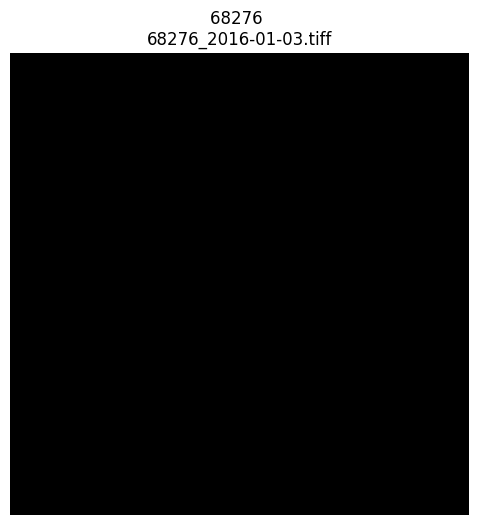

(origin shape: 68276_2016-05-01.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


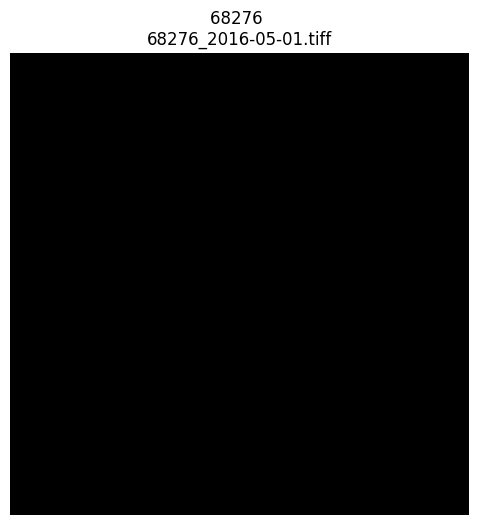

(origin shape: 68276_2016-07-10.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


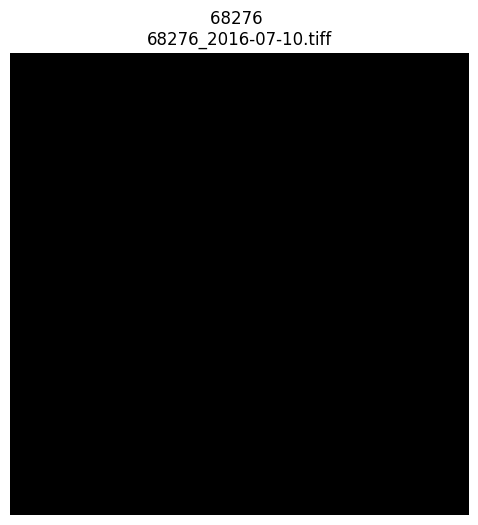

(origin shape: 68276_2016-10-02.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


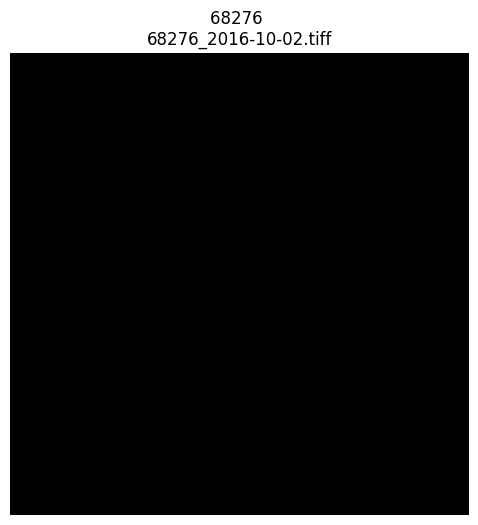

(origin shape: 68276_2016-09-18.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


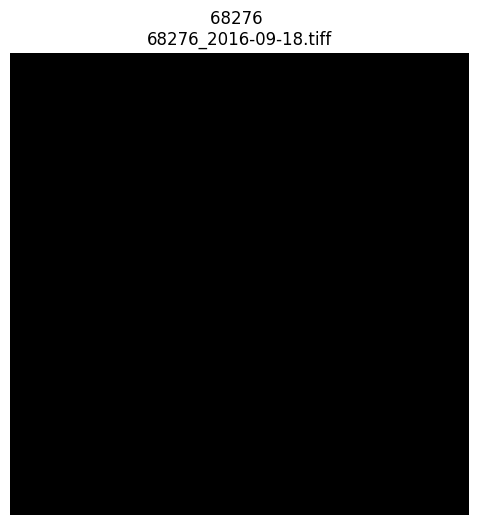

(origin shape: 68276_2016-12-25.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


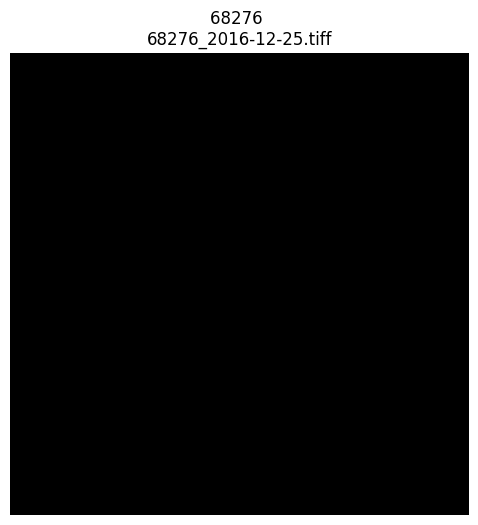

(origin shape: 68276_2016-06-26.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


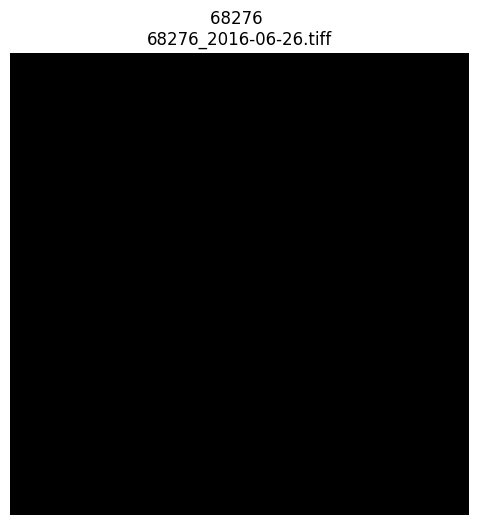

(origin shape: 68276_2016-07-31.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


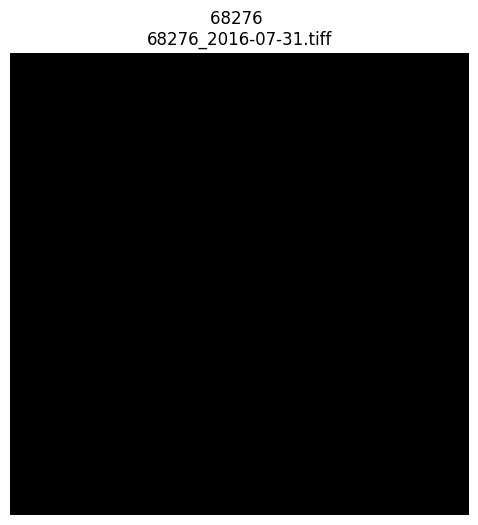

(origin shape: 68276_2016-08-14.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


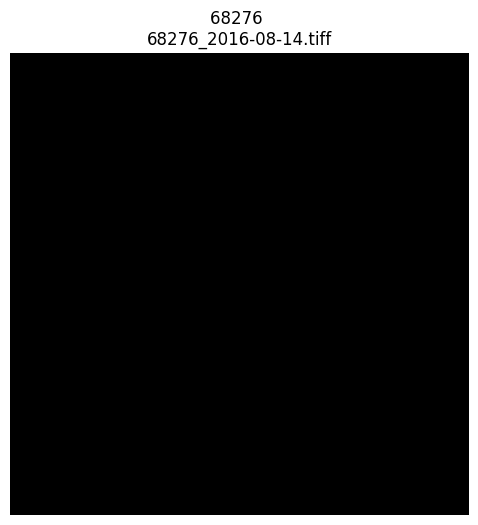

(origin shape: 68276_2016-10-23.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


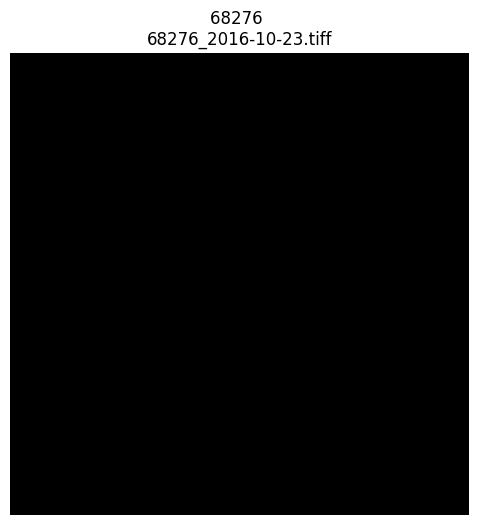

(origin shape: 68276_2016-04-17.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


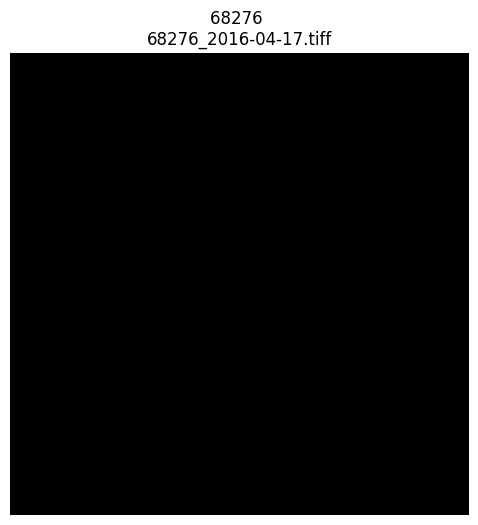

(origin shape: 68276_2016-03-13.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


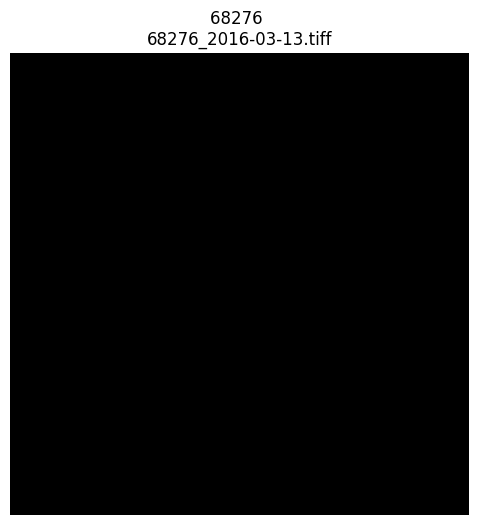

(origin shape: 68276_2016-02-28.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


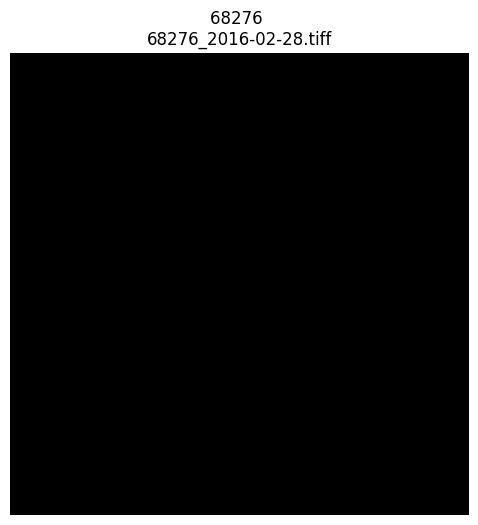

(origin shape: 68276_2016-12-04.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


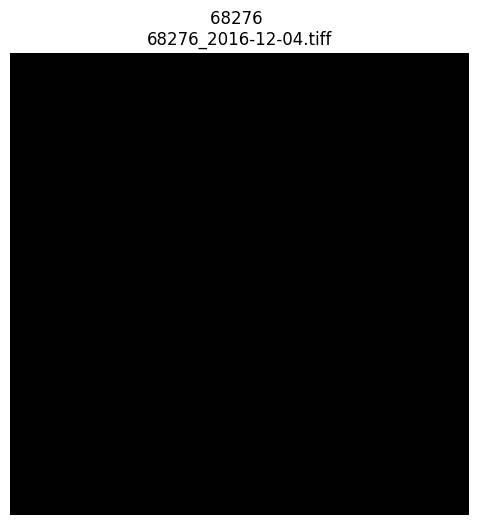

(origin shape: 68276_2016-09-04.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


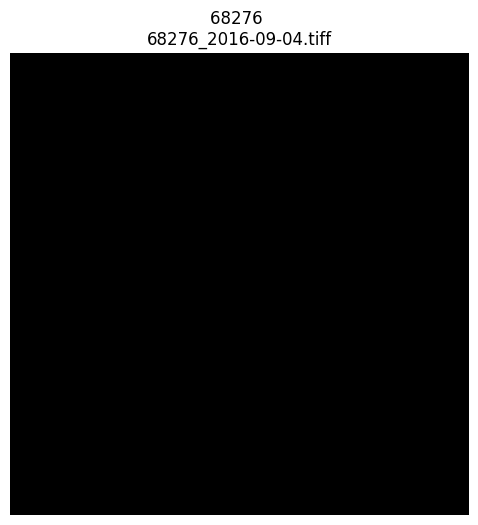

(origin shape: 68276_2016-11-13.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


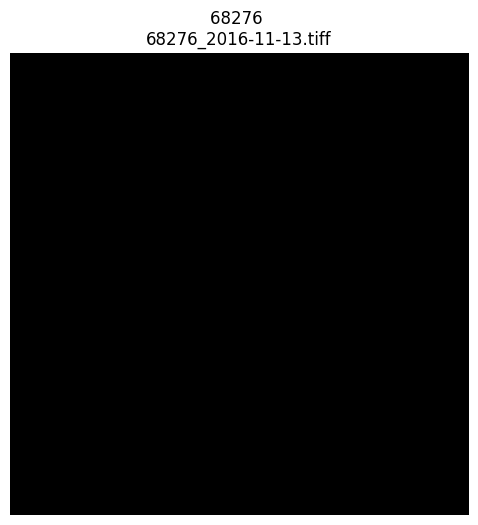

(origin shape: 68276_2016-04-10.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


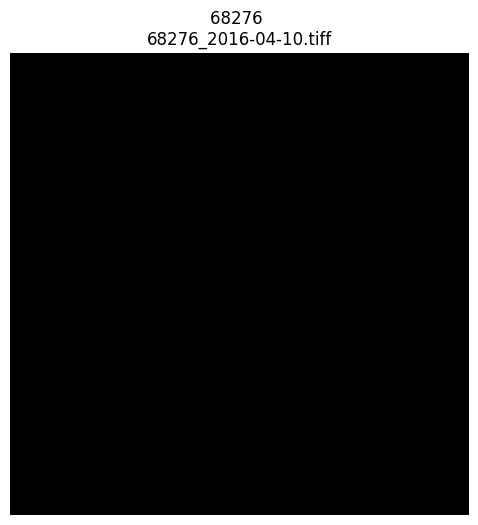

(origin shape: 68276_2016-07-17.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


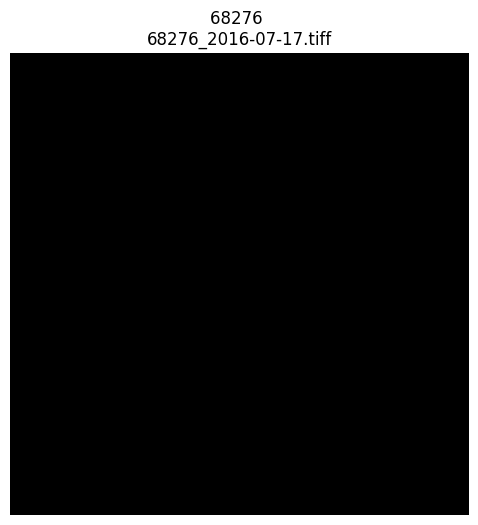

(origin shape: 68276_2016-09-25.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


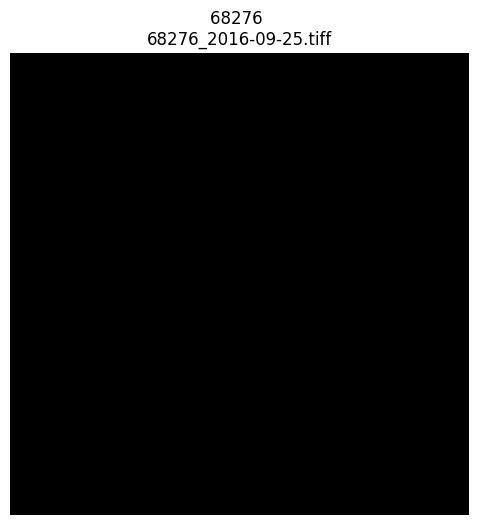

(origin shape: 68276_2016-02-14.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


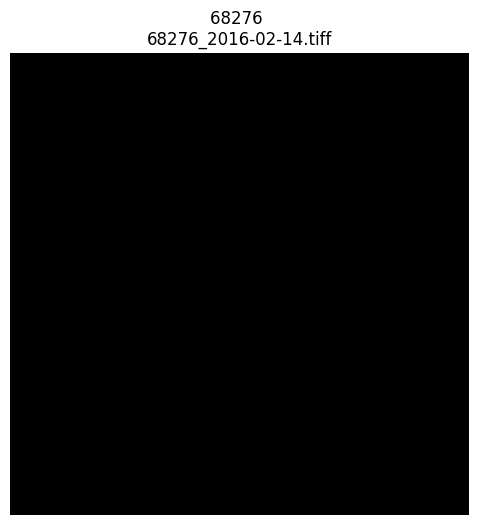

(origin shape: 68276_2016-01-24.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


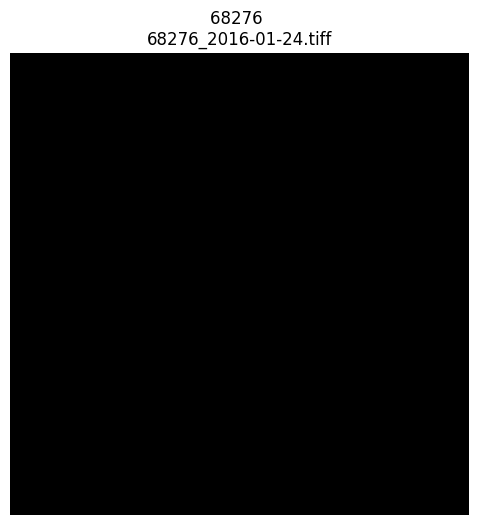

(origin shape: 68276_2016-10-09.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


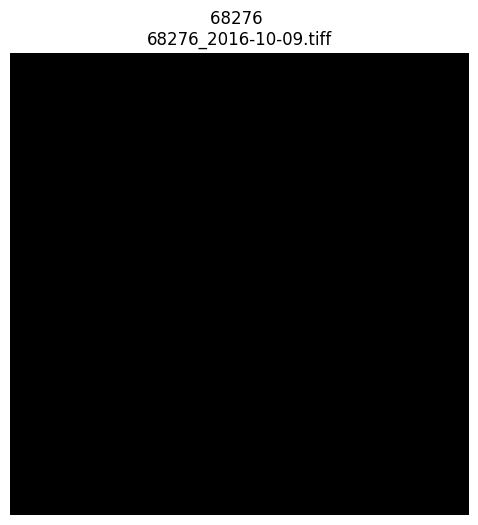

(origin shape: 68276_2016-08-28.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


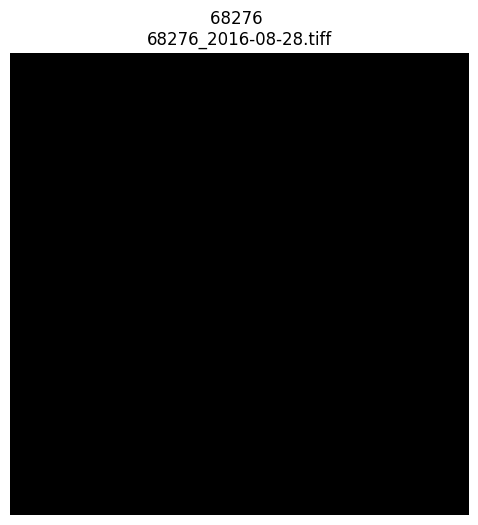

(origin shape: 68276_2016-12-18.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


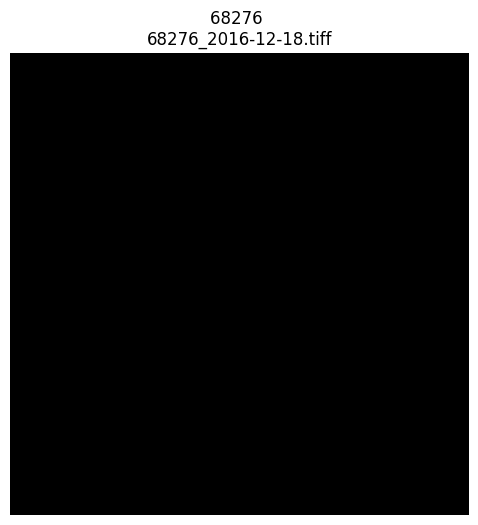

(origin shape: 68276_2016-11-27.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


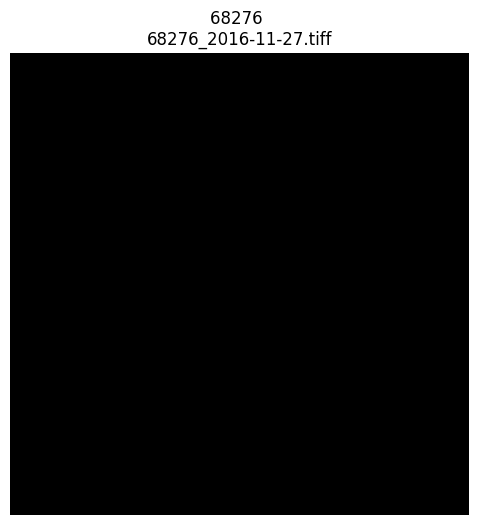

(origin shape: 68276_2016-01-31.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


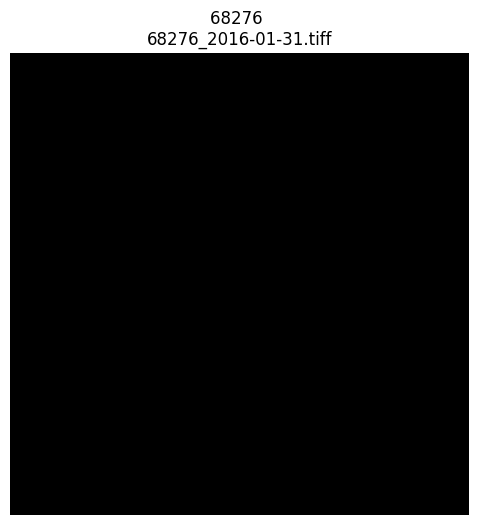

(origin shape: 68276_2016-02-21.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


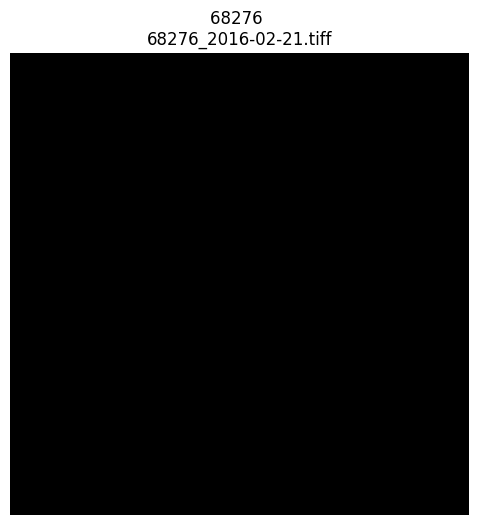

(origin shape: 68276_2016-03-20.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


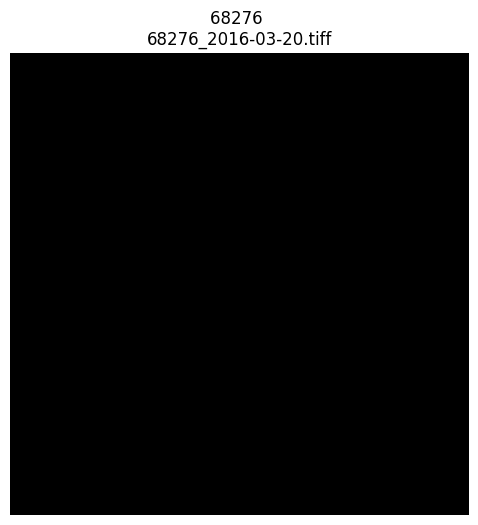

(origin shape: 68276_2016-10-30.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


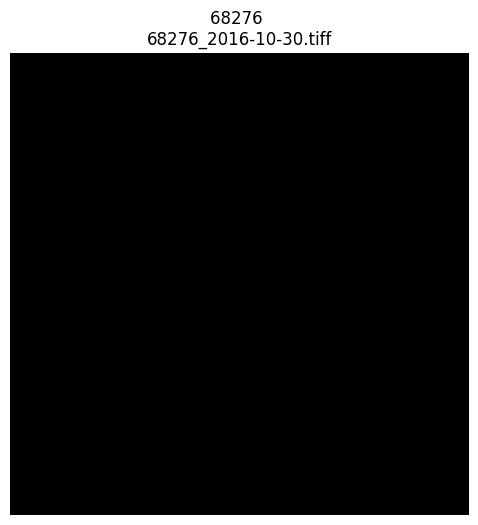

(origin shape: 68276_2016-08-07.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


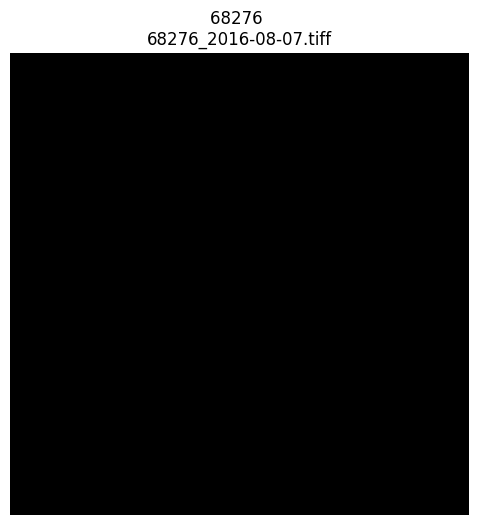

(origin shape: 68276_2016-04-24.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


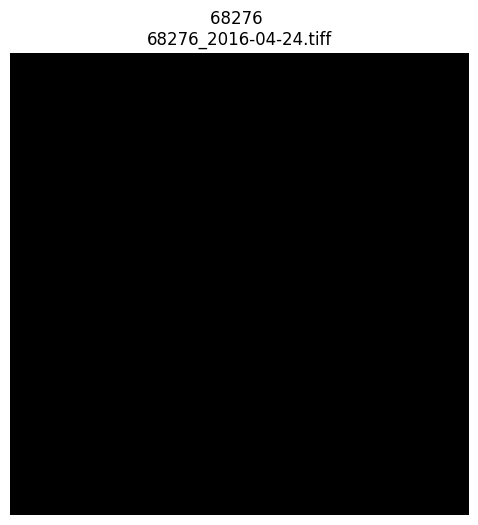

(origin shape: 68276_2016-06-19.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


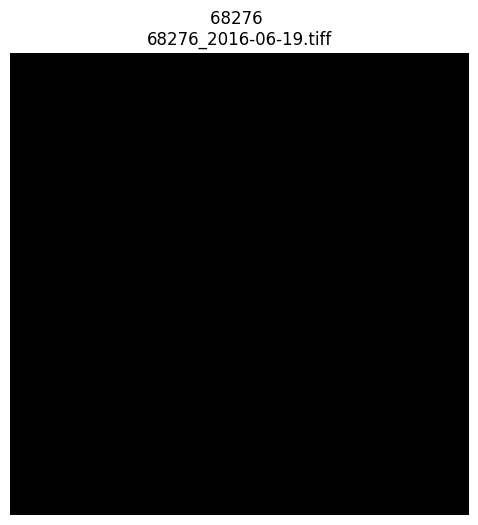

(origin shape: 68276_2016-05-29.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


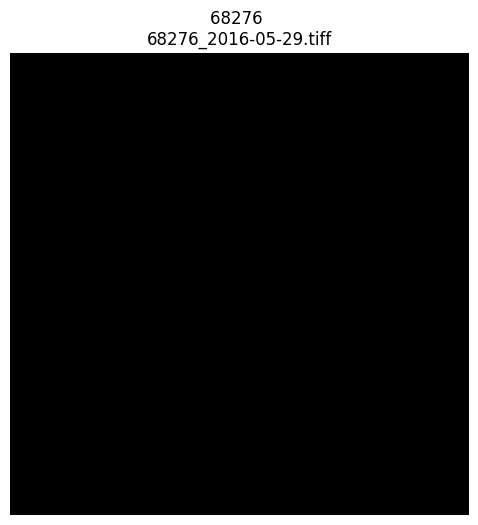

(origin shape: 68276_2016-11-06.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


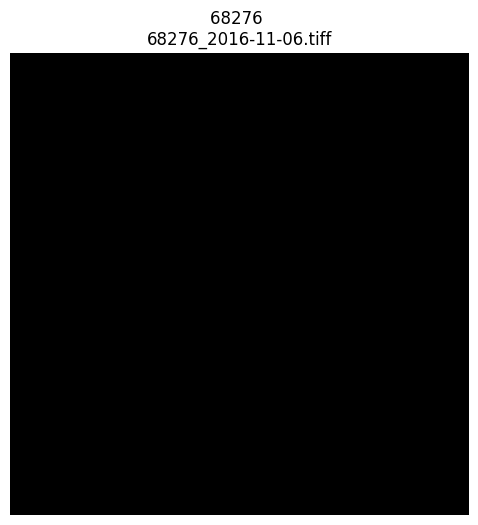

(origin shape: 68276_2016-01-10.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


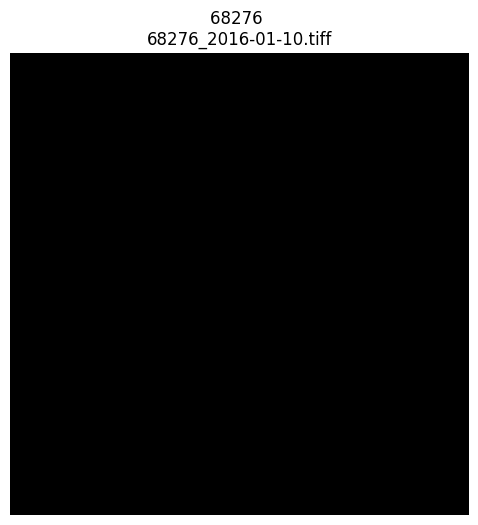

(origin shape: 68276_2016-07-03.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


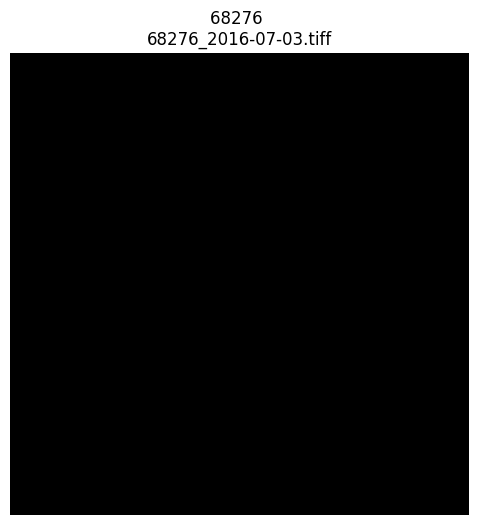

(origin shape: 68276_2016-05-08.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


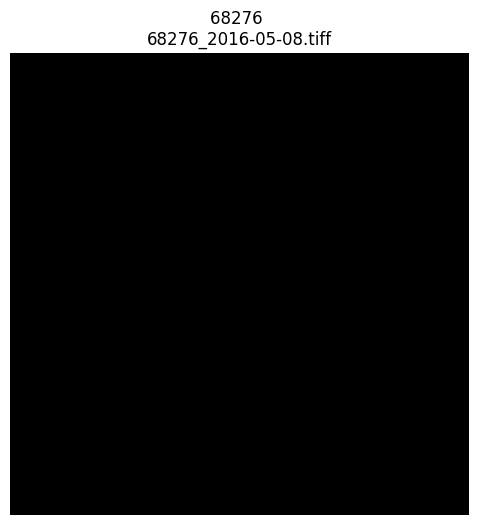

(origin shape: 68276_2016-09-11.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


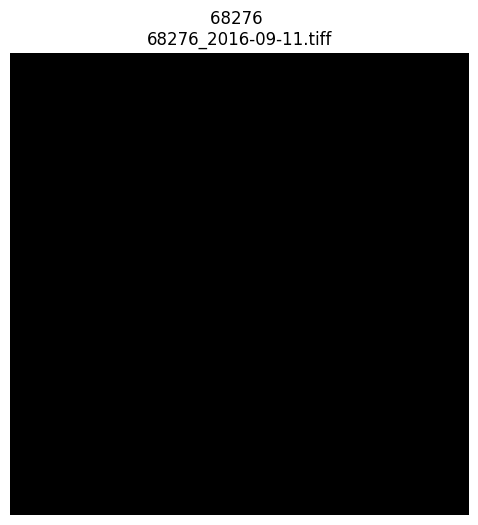

(origin shape: 68276_2016-10-16.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


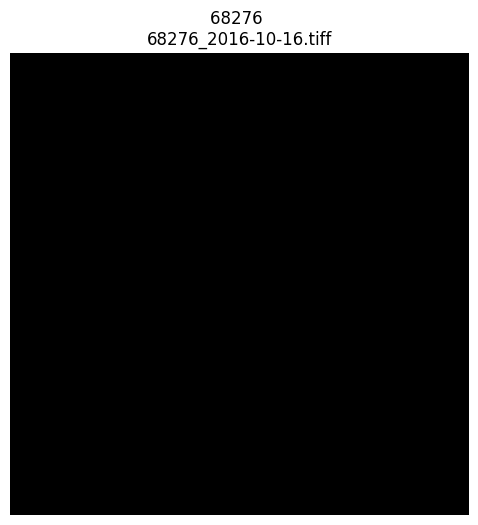

(origin shape: 68276_2016-03-06.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


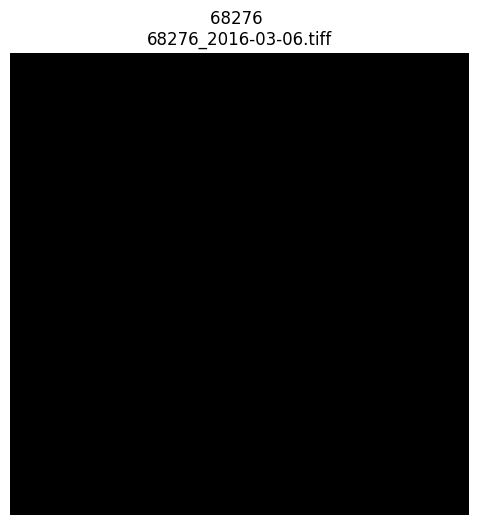

(origin shape: 68276_2016-08-21.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


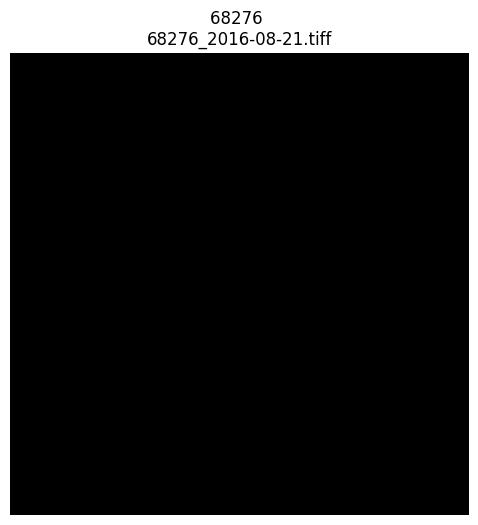

(origin shape: 68276_2016-02-07.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


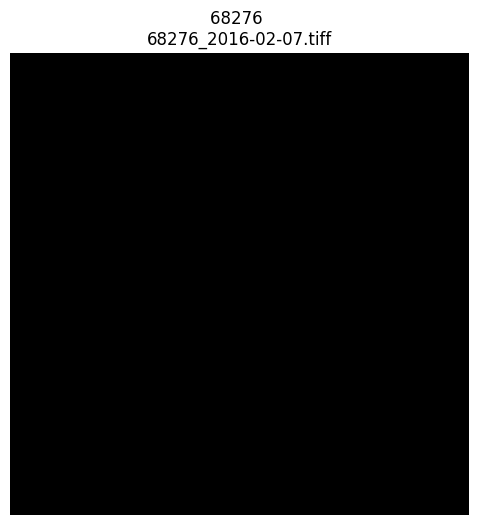

(origin shape: 68276_2016-01-17.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


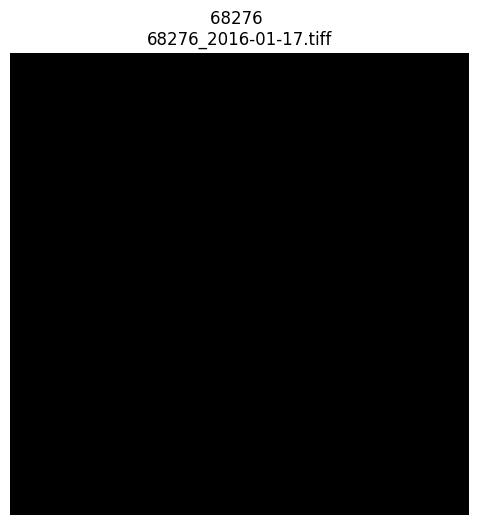

(origin shape: 68276_2016-06-05.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


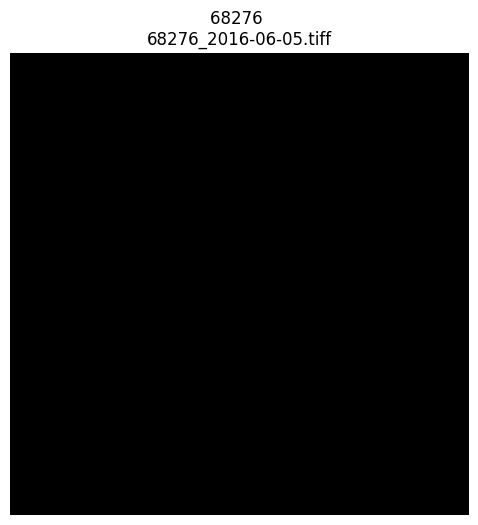

(origin shape: 68276_2016-05-15.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


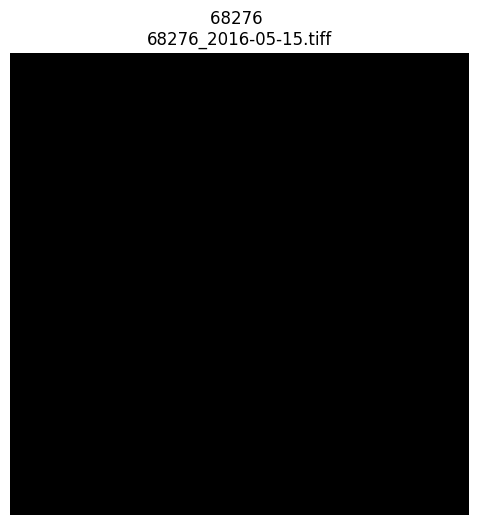

(origin shape: 68276_2016-12-11.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


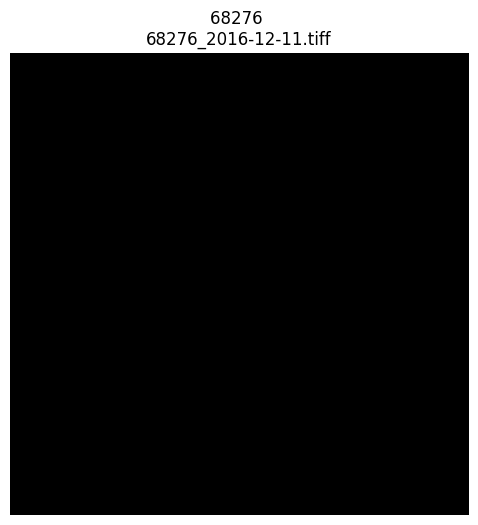

(origin shape: 68276_2016-07-24.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


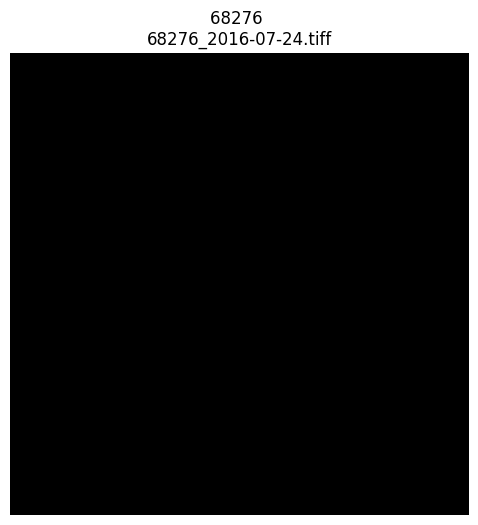

(origin shape: 68276_2016-03-27.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


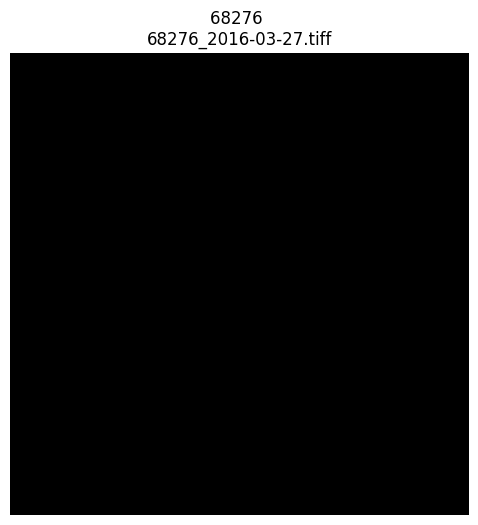

(origin shape: 68276_2016-05-22.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


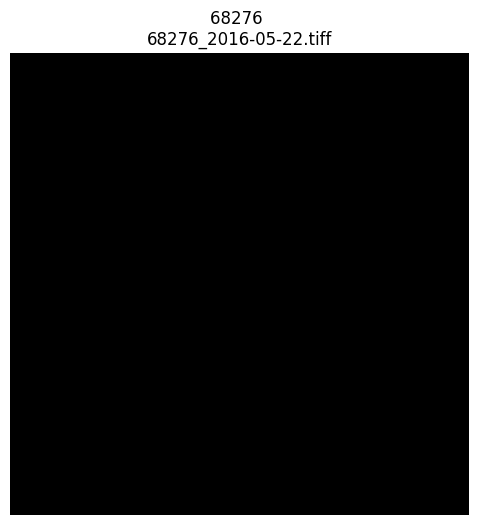

(origin shape: 68276_2016-11-20.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


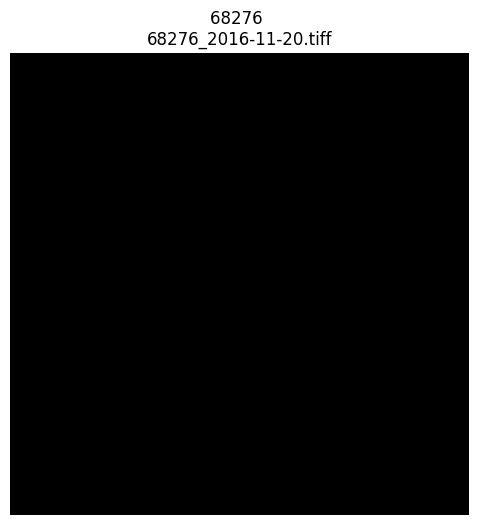

(origin shape: 68276_2016-06-12.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


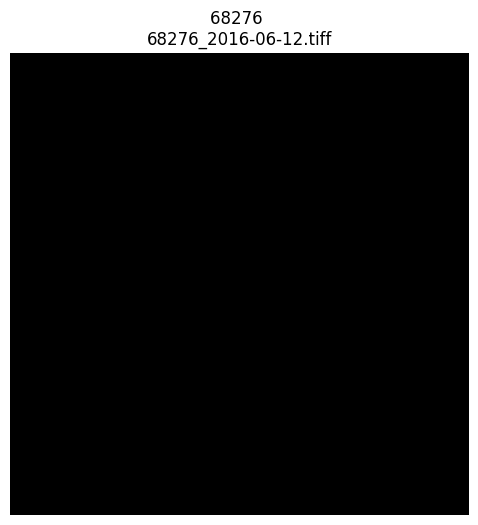

(origin shape: 68276_2016-04-03.tiff: (749, 743, 12) -> rescale: (749, 743, 12)) - Range -> [(0.0, 0.0)]


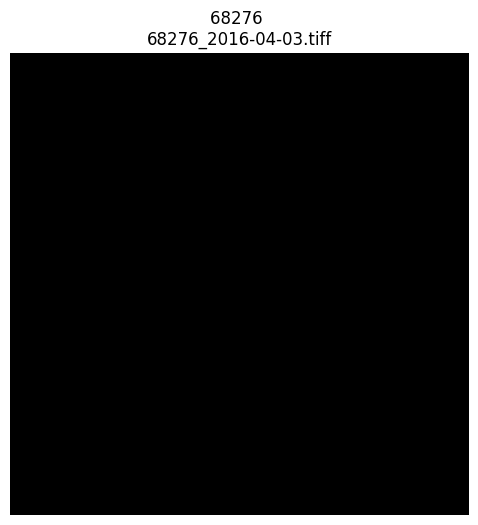

(origin shape: 5088_2016-12-25.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


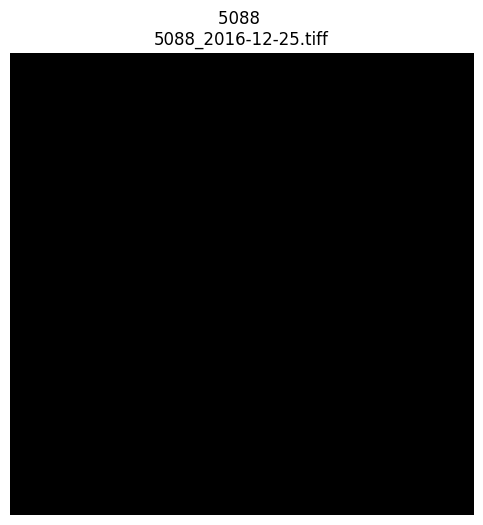

(origin shape: 5088_2016-07-10.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


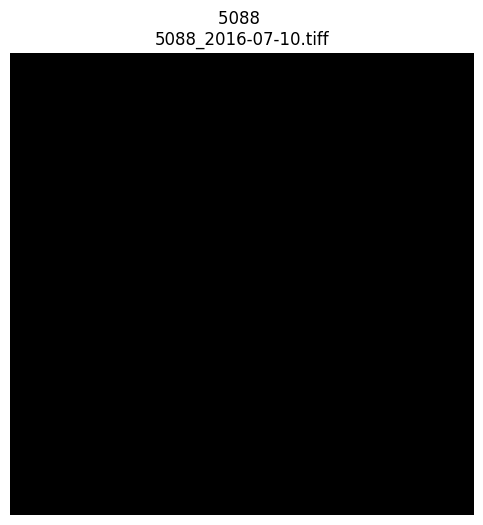

(origin shape: 5088_2016-10-02.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


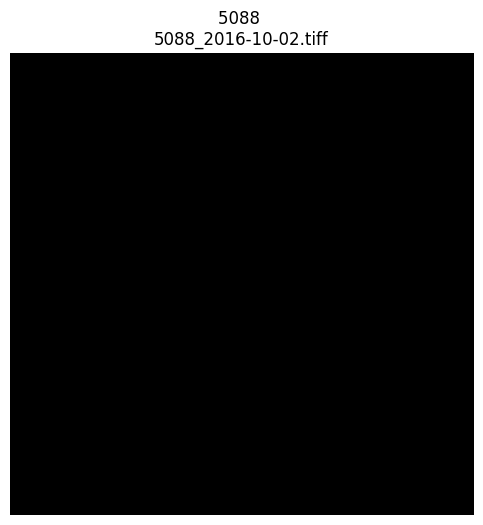

(origin shape: 5088_2016-09-18.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


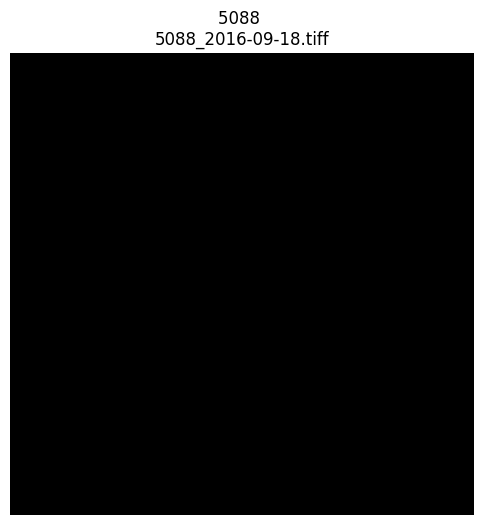

(origin shape: 5088_2016-01-03.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


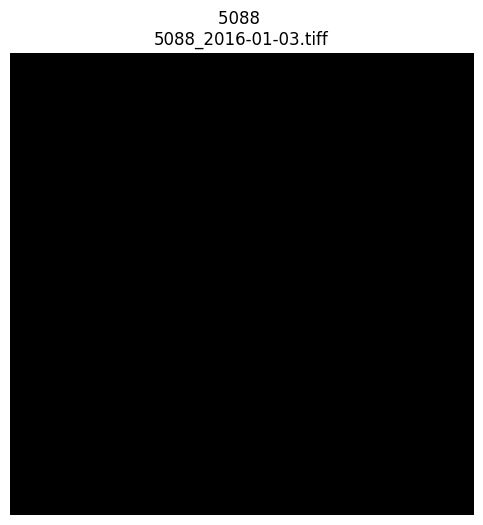

(origin shape: 5088_2016-05-01.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


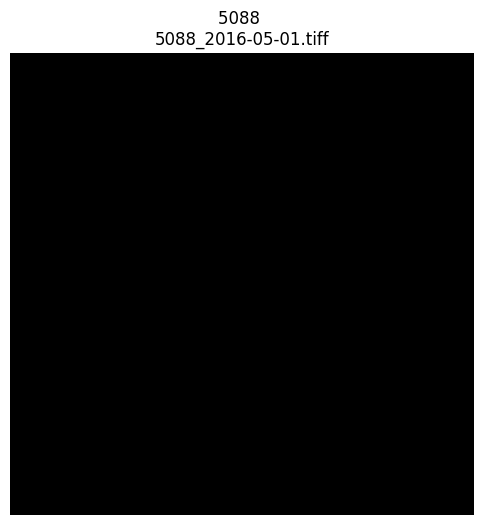

(origin shape: 5088_2016-12-04.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


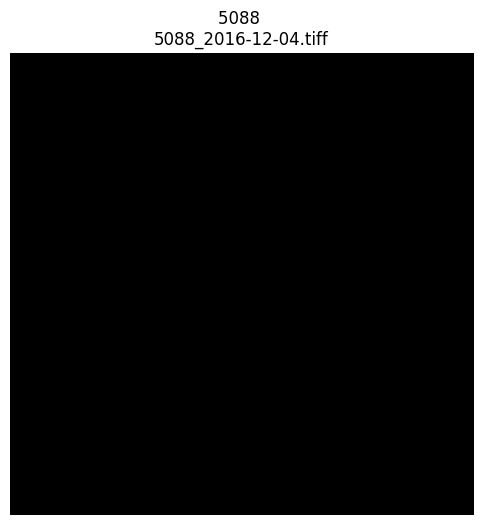

(origin shape: 5088_2016-04-17.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


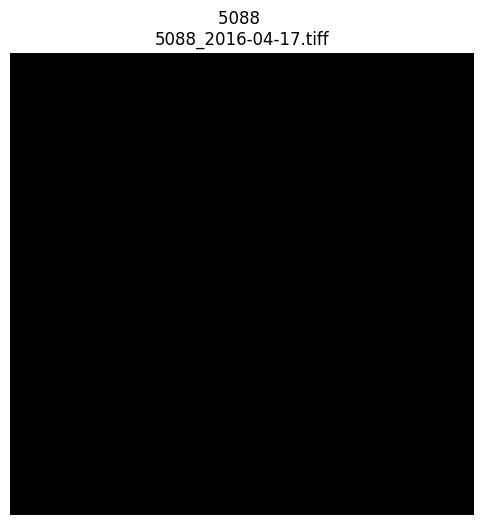

(origin shape: 5088_2016-03-13.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


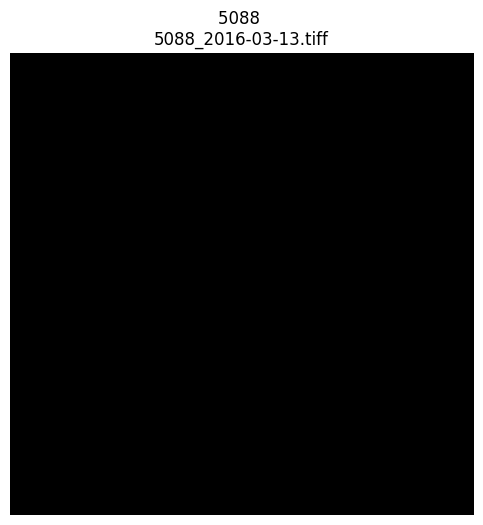

(origin shape: 5088_2016-02-28.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


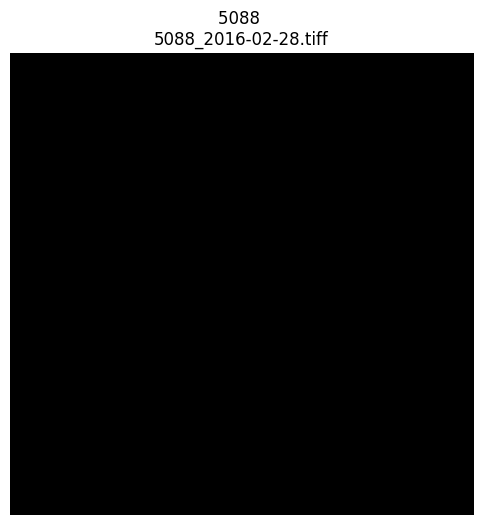

(origin shape: 5088_2016-07-31.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


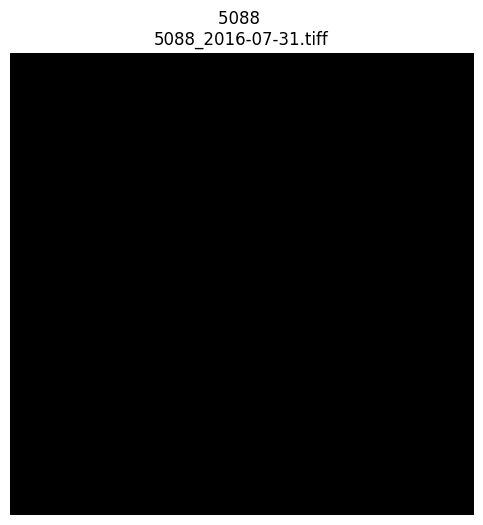

(origin shape: 5088_2016-08-14.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


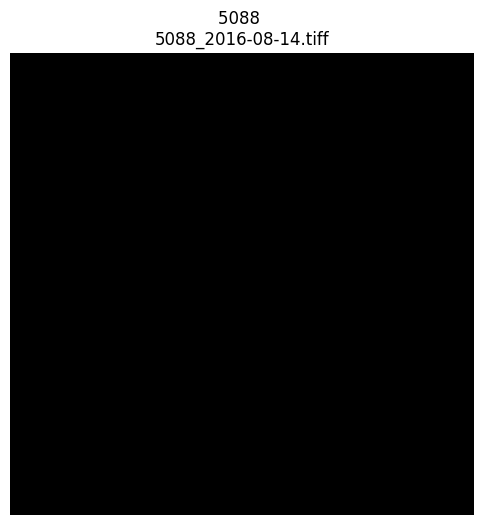

(origin shape: 5088_2016-10-23.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


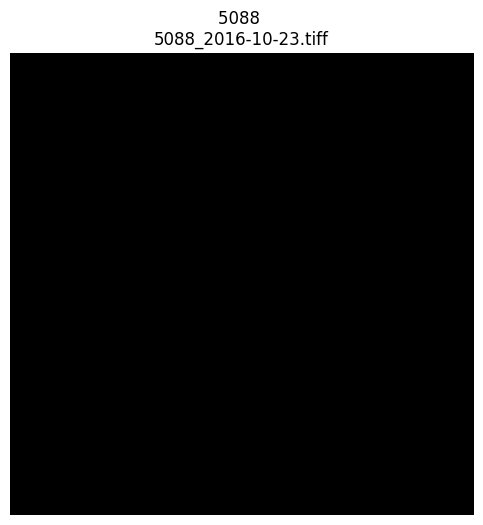

(origin shape: 5088_2016-06-26.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


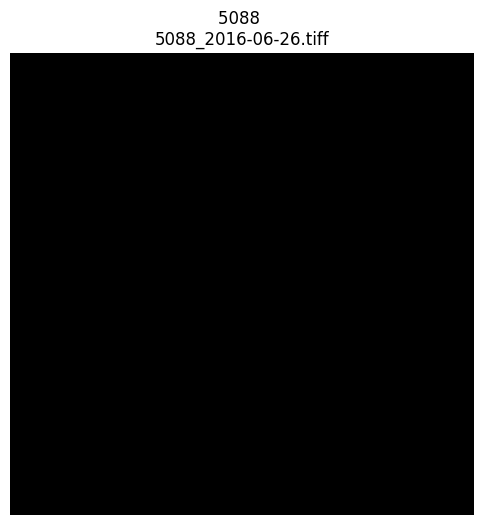

(origin shape: 5088_2016-04-10.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


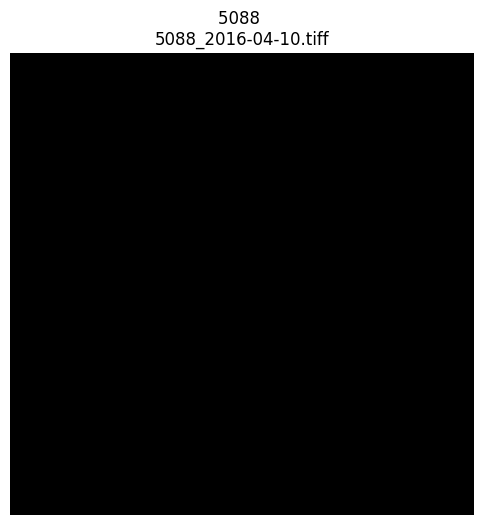

(origin shape: 5088_2016-11-13.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


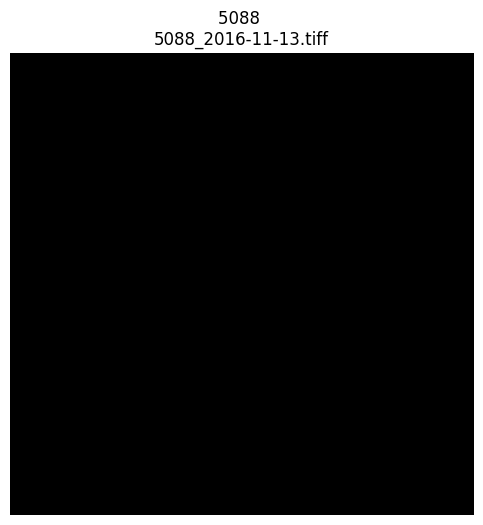

(origin shape: 5088_2016-09-04.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


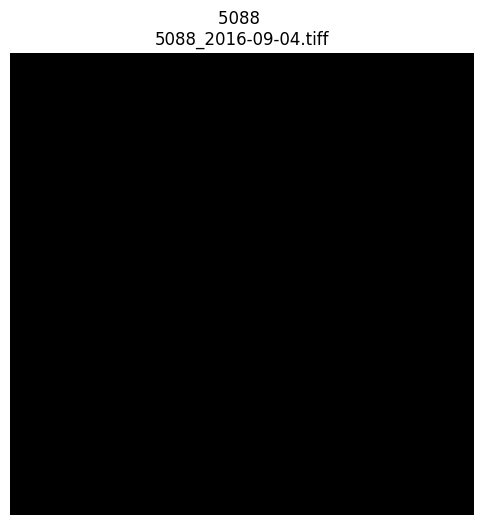

(origin shape: 5088_2016-12-18.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


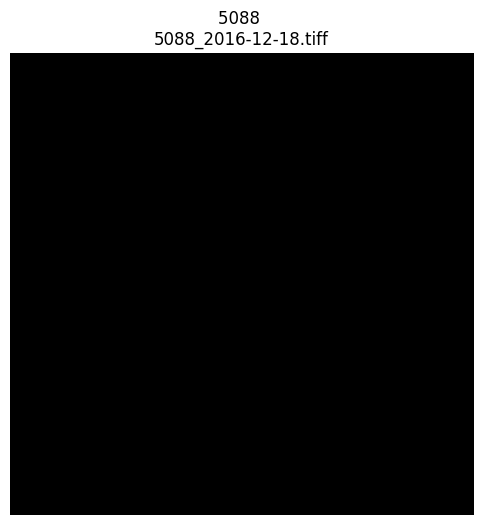

(origin shape: 5088_2016-10-09.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


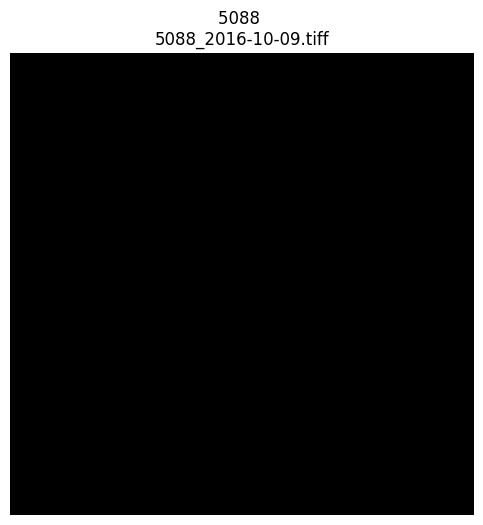

(origin shape: 5088_2016-01-24.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


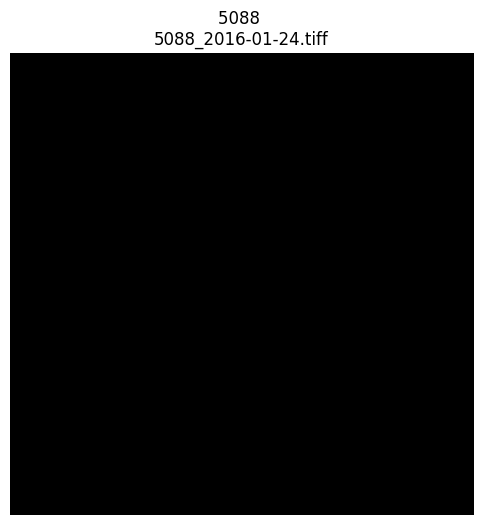

(origin shape: 5088_2016-08-28.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


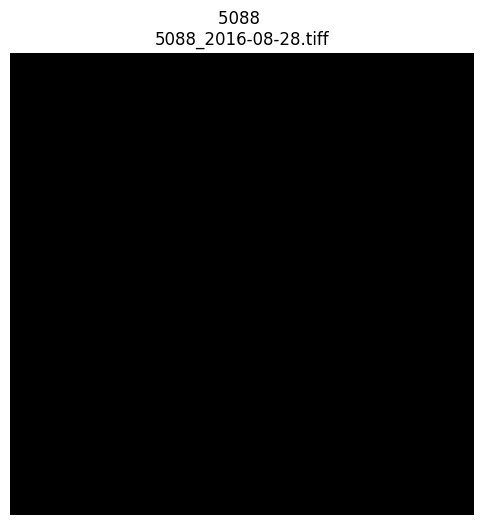

(origin shape: 5088_2016-09-25.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


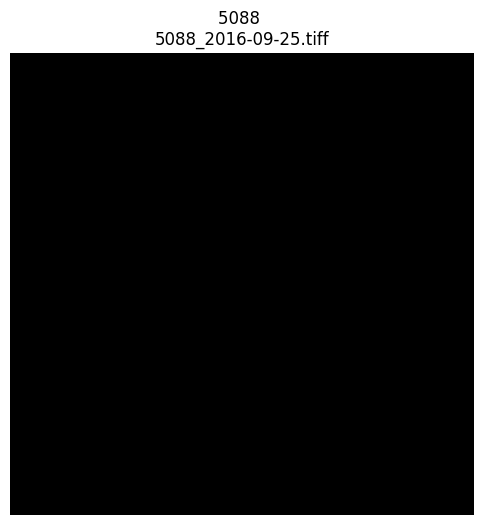

(origin shape: 5088_2016-02-14.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


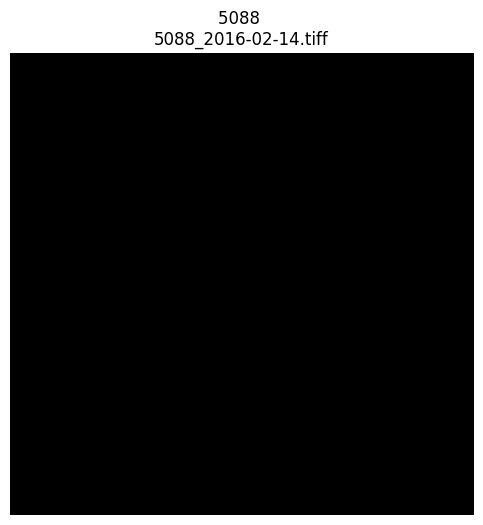

(origin shape: 5088_2016-07-17.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


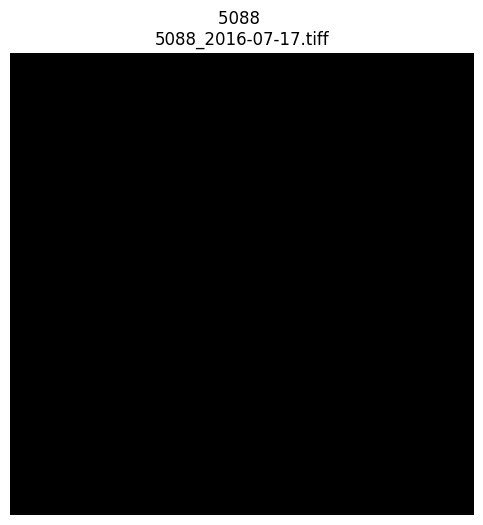

(origin shape: 5088_2016-05-29.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


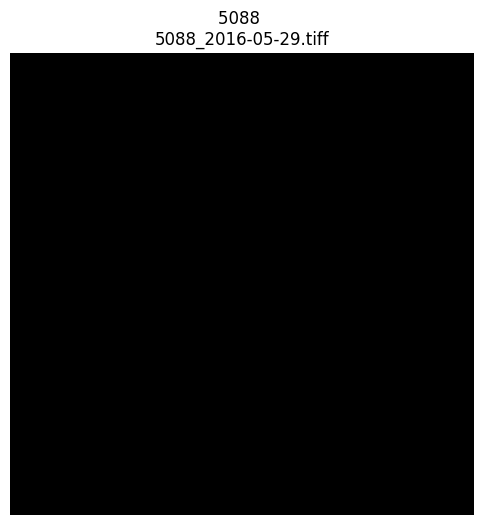

(origin shape: 5088_2016-10-30.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


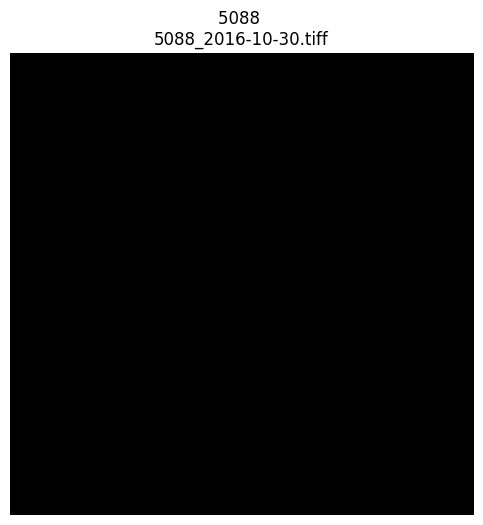

(origin shape: 5088_2016-03-20.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


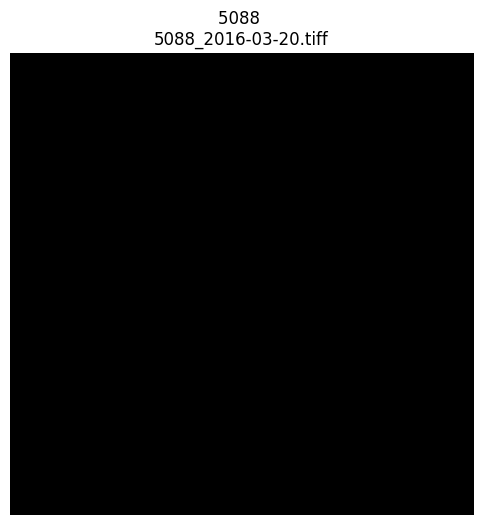

(origin shape: 5088_2016-04-24.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


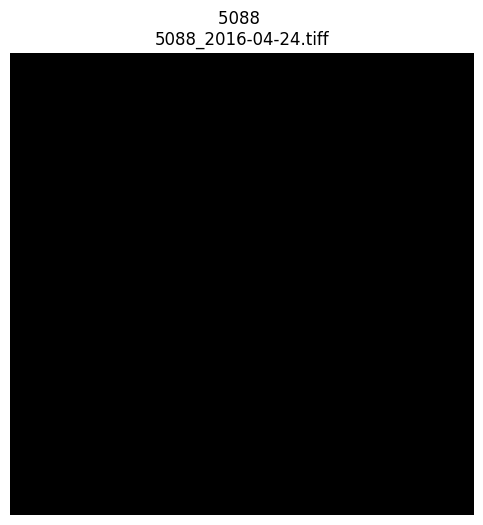

(origin shape: 5088_2016-06-19.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


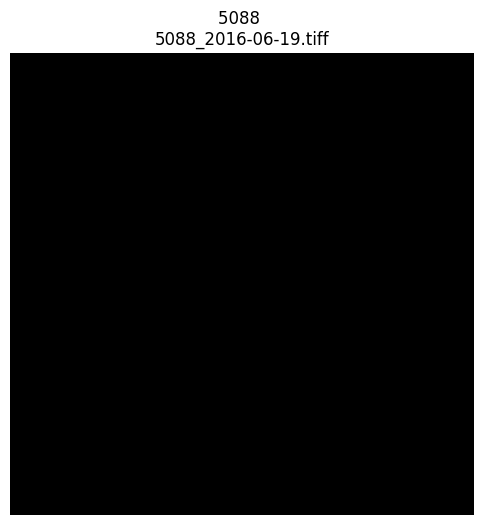

(origin shape: 5088_2016-08-07.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


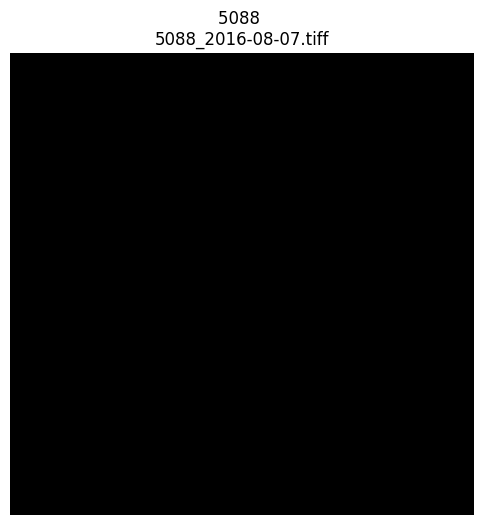

(origin shape: 5088_2016-11-27.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


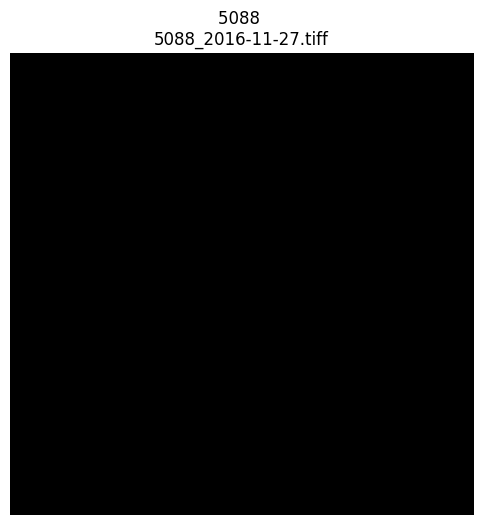

(origin shape: 5088_2016-02-21.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


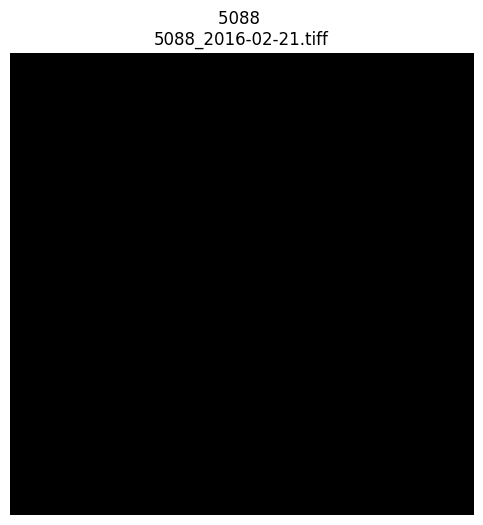

(origin shape: 5088_2016-01-31.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


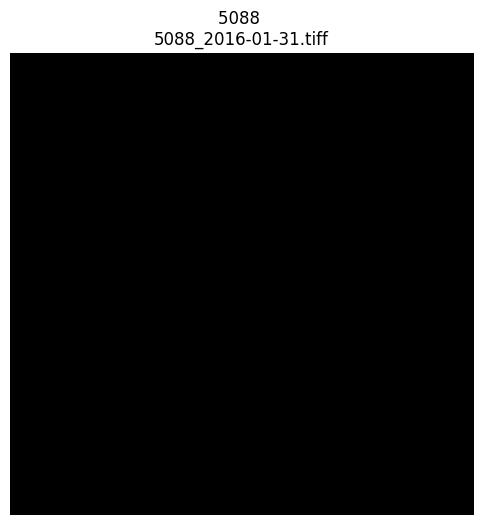

(origin shape: 5088_2016-09-11.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


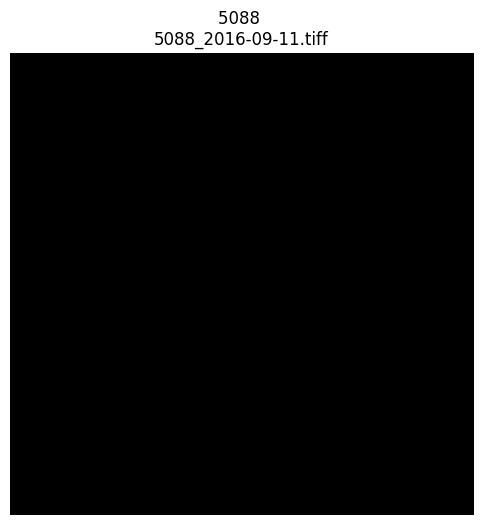

(origin shape: 5088_2016-05-08.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


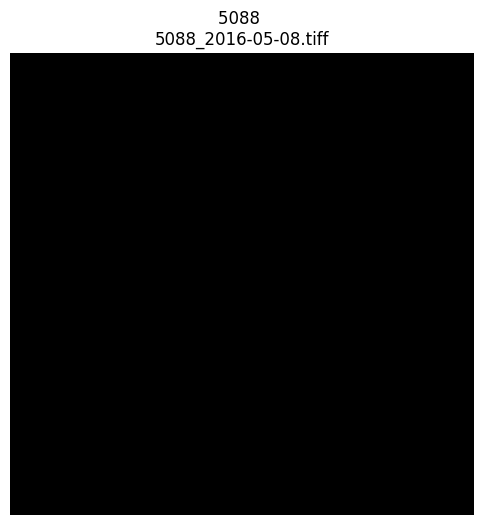

(origin shape: 5088_2016-07-03.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


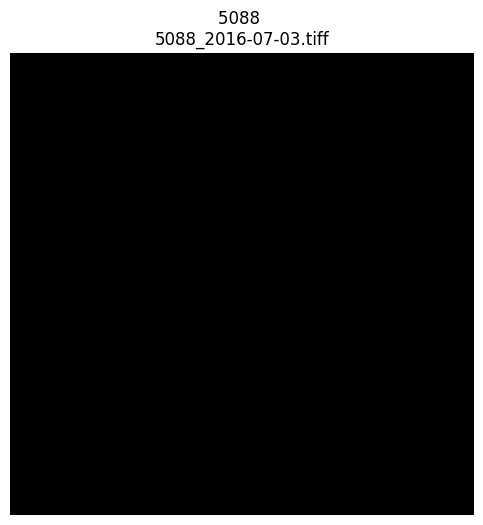

(origin shape: 5088_2016-11-06.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


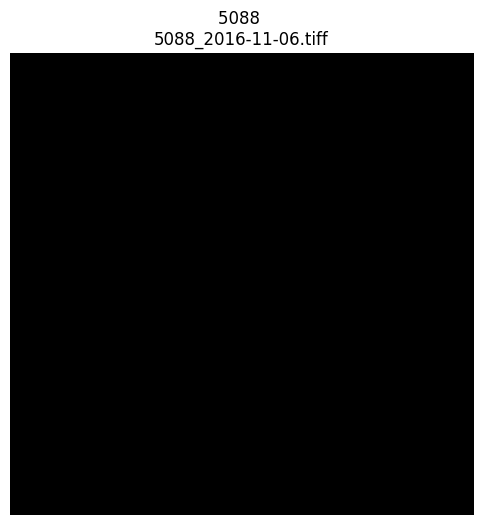

(origin shape: 5088_2016-01-10.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


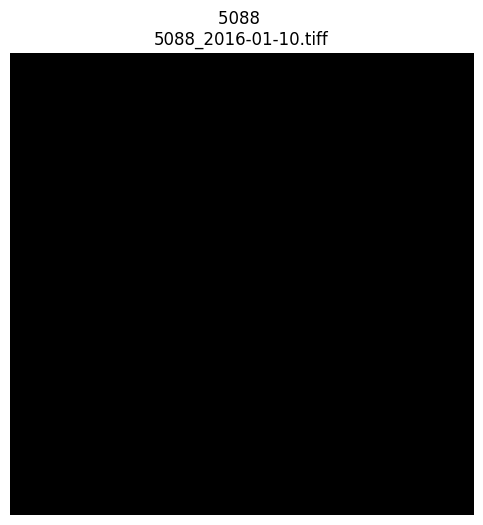

(origin shape: 5088_2016-07-24.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


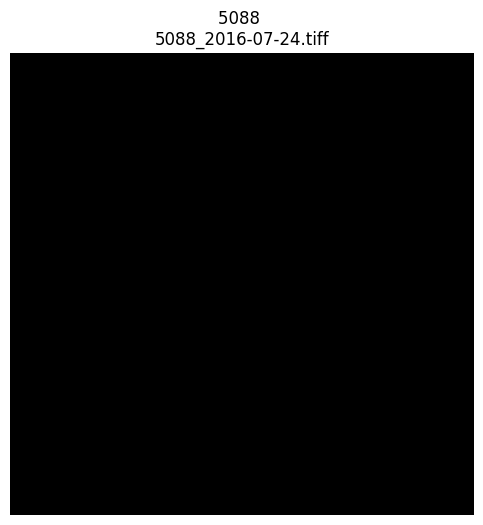

(origin shape: 5088_2016-01-17.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


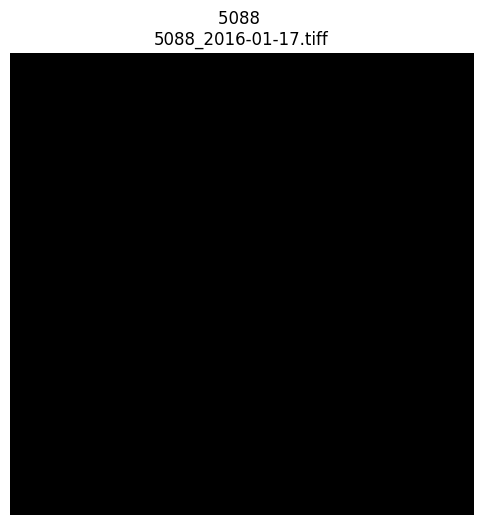

(origin shape: 5088_2016-02-07.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


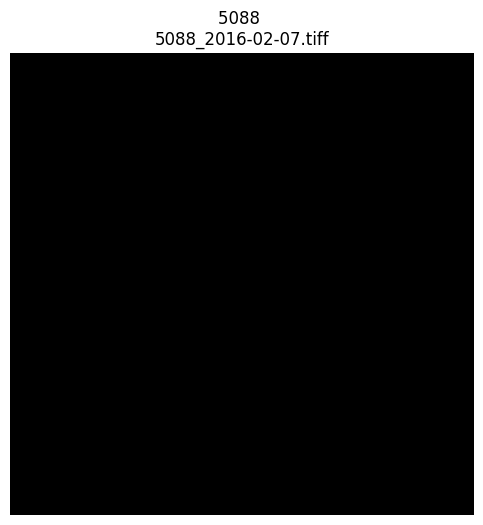

(origin shape: 5088_2016-05-15.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


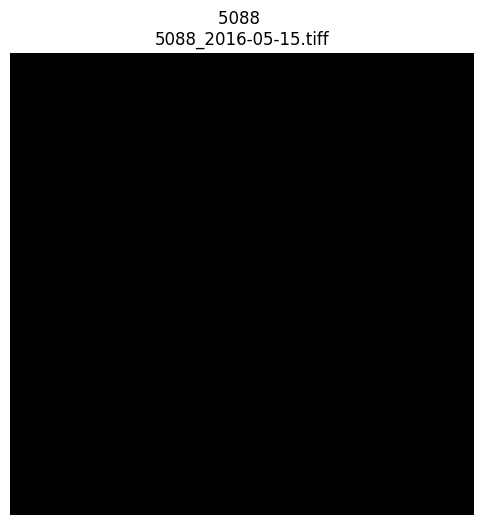

(origin shape: 5088_2016-06-05.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


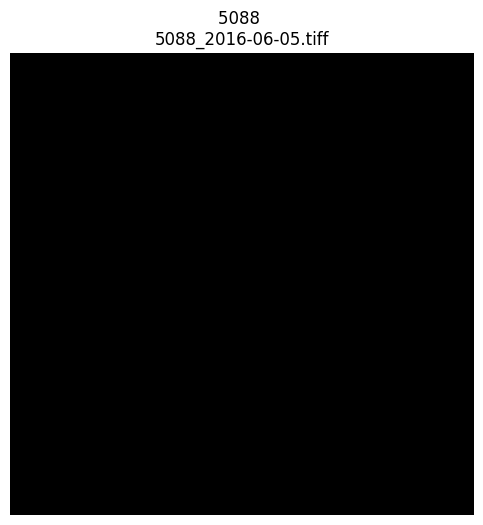

(origin shape: 5088_2016-12-11.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


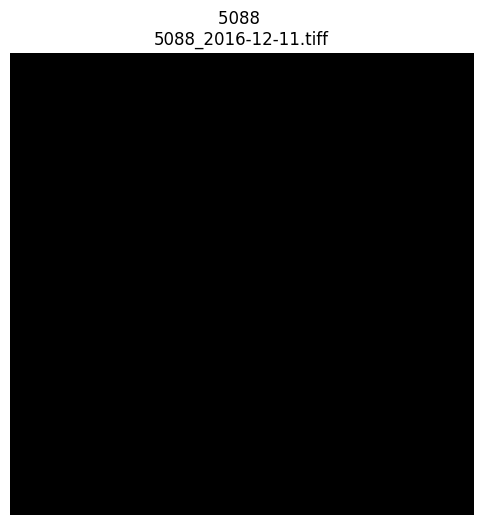

(origin shape: 5088_2016-03-06.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


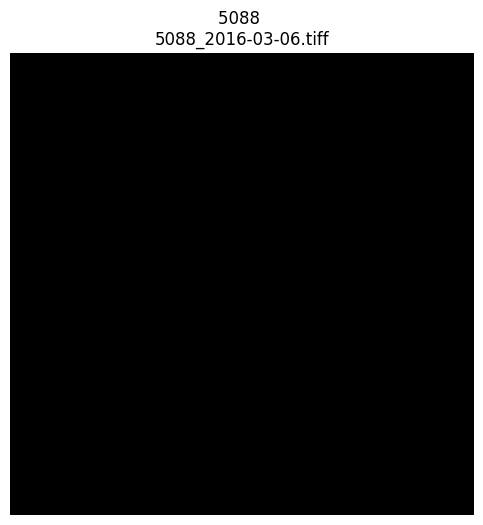

(origin shape: 5088_2016-10-16.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


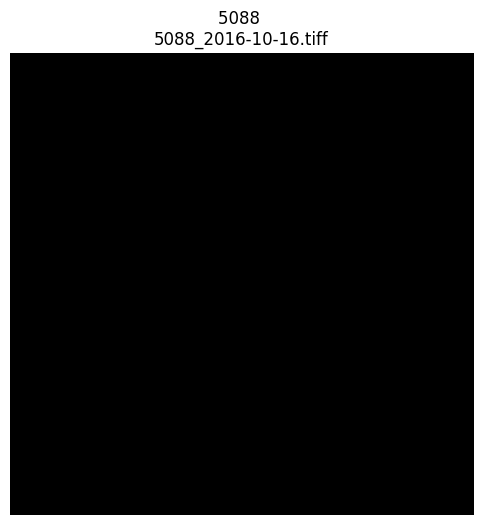

(origin shape: 5088_2016-08-21.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


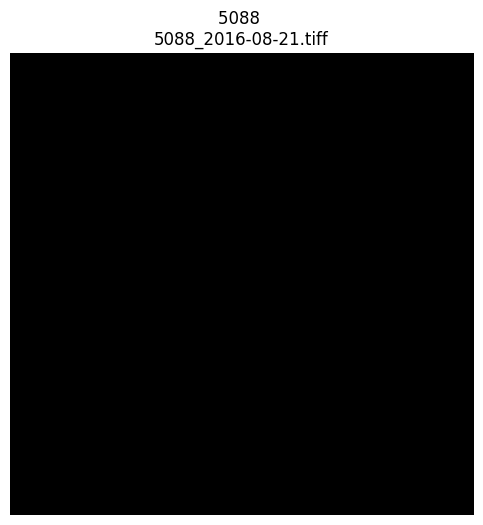

(origin shape: 5088_2016-04-03.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


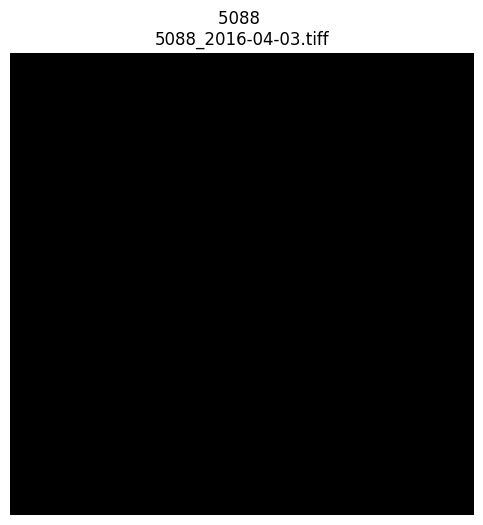

(origin shape: 5088_2016-06-12.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


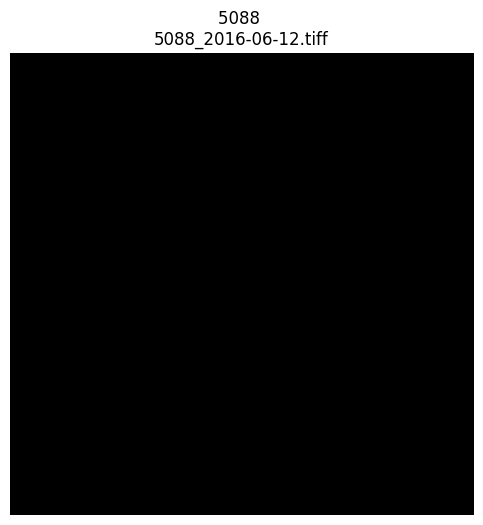

(origin shape: 5088_2016-05-22.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


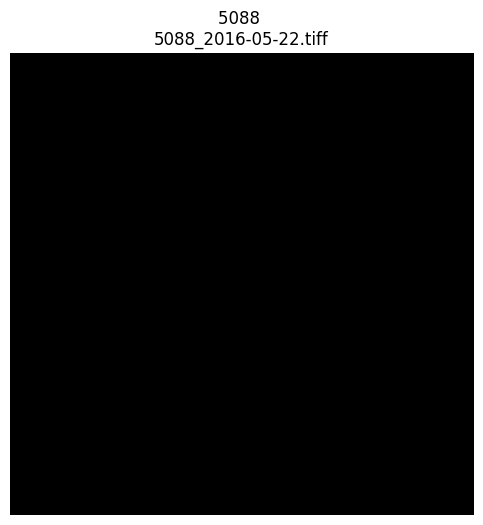

(origin shape: 5088_2016-11-20.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


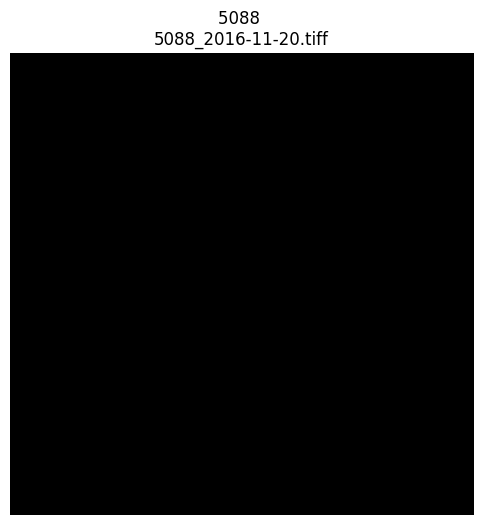

(origin shape: 5088_2016-03-27.tiff: (745, 747, 12) -> rescale: (745, 747, 12)) - Range -> [(0.0, 0.0)]


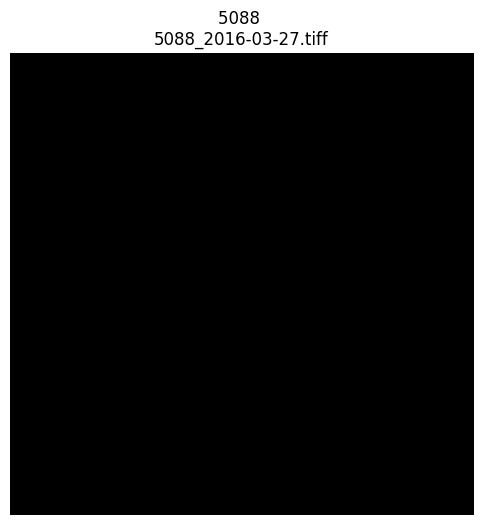

In [21]:
import glob
import os
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import random
#data = "/Users/sebasmos/Downloads/unlabeled-5-top-cities-16-bit-depth"
data = "/Users/sebasmos/Desktop/satellite.extractor/satellite_extractor/DATASET"
folders = glob.glob(os.path.join(data, '*'))
pdf_pages = PdfPages("output.pdf")

def read_tiff(img_path, resize_ratio=None, resizing=True, normalize=True, printing=True):
    img = io.imread(img_path)
    img_F = img.copy()

    path_img = os.path.basename(img_path)
    if normalize:
        CHANNELS = range(12)
        img_F = np.dstack([
            exposure.rescale_intensity(img_F[:, :, c], out_range=(0, 1))
            for c in CHANNELS])
    if printing:
        print(f"(origin shape: {path_img}: {img.shape} -> rescale: {str(img_F.shape)}) - Range -> [{img_F.min(), img_F.max()}]")
    return img_F

for i, folder in enumerate(folders):
    selected_files = glob.glob(os.path.join(folder, '*.tiff'))

    for j, tiff_file in enumerate(selected_files):
        fig, axes = plt.subplots(1, 1, figsize=(6, 6))
        
        image = read_tiff(tiff_file)
        image = np.array(image)
        image = image[:, :, 1:4]
        axes.imshow(image)

        folder_name = os.path.basename(folder)
        file_name = os.path.basename(tiff_file)
        title = f"{folder_name} \n{file_name}"
        axes.set_title(title)
        axes.axis('off')

        plt.show()